In [12]:
#%matplotlib notebook
# removed as jupyter keeps hanging when trying to rotate the 3D plot

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys

In [14]:
timebased_res = pd.read_csv("locomotec-res-timebased-python", delim_whitespace=True)
timebased_res

,Testing,uvMissSurface,uvExcessHuman,fuzzOpTimes,Graphtag,FuzzingOp
0,Test:Test_028_14_11_2022_11_42_37,0.00,0.00,0.08,0,1:personDetectionDelay([2.43-4.10])FixedTimeAc...
1,Test:Test_360_15_11_2022_03_58_45,9.72,0.08,522.88,3,5:personDetectionPacketLossAll([0.00-0.00])Fix...
2,Test:Test_509_15_11_2022_12_26_41,11.10,0.00,146.46,0,1:personDetectionPacketLossAll([0.00-0.00])Fix...
3,Test:Test_939_16_11_2022_11_55_44,0.00,0.00,0.08,2,1:personDetectionDelay([2.43-4.10])FixedTimeAc...
4,Test:Test_944_16_11_2022_13_05_58,0.00,15.54,213.78,0,3:distortPersonSector([0.72-1.31])FixedTimeAct...
5,Test:Test_985_16_11_2022_15_27_28,0.00,10.96,105.22,0,3:personDetectionDelay([2.43-4.10])FixedTimeAc...
6,Test:Test_780_16_11_2022_02_44_56,7.60,0.54,264.50,0,6:personDetectionPacketLossAll([0.00-0.00])Fix...
7,Test:Test_856_16_11_2022_07_17_56,7.00,7.30,372.98,0,6:distortPersonSector([0.75-1.08])FixedTimeAct...
8,Test:Test_723_16_11_2022_00_30_03,2.15,8.91,159.14,0,6:distortPersonSector([1.02-1.13])FixedTimeAct...
9,Test:Test_837_16_11_2022_06_09_15,6.75,7.48,447.02,0,7:personDetectionPacketLossAll([0.00-0.00])Fix...


In [15]:
condbased_res = pd.read_csv("locomotec-res-condfuzz-python", delim_whitespace=True)
condbased_res

,Testing,uvMissSurface,uvDisinfectionS1,uvDisinfectionS2,uvDisinfectionS3,uvExposureForHuman_p1,uvExcessHuman,fuzzOpTimes,FuzzingOp
0,Test:Test_455_19_11_2022_18_21_08,4.72,10.88,1.62,1.06,18.68,15.68,266.67,2:distortPersonSector([0.59-1.09])ConditionBas...
1,Test:Test_774_20_11_2022_12_24_28,4.74,10.67,1.59,1.07,18.65,15.65,266.85,2:distortPersonSector([1.34-1.45])ConditionBas...
2,Test:Test_812_20_11_2022_14_46_18,1.49,21.80,2.19,12.89,0.24,0.00,0.00,0:
3,Test:Test_957_20_11_2022_23_16_10,11.10,0.00,0.00,0.00,0.00,0.00,124.89,2:distortPersonSector([-1.30--1.28])ConditionB...
4,Test:Test_992_21_11_2022_01_45_56,0.00,20.08,6.64,7.69,15.44,12.44,102.49,1:distortPersonSector([1.47-1.49])ConditionBas...
5,Test:Test_603_20_11_2022_02_38_16,5.83,13.14,0.86,0.71,10.41,7.41,200.92,2:personDetectionPacketLossAll([0.00-0.00])Con...
6,Test:Test_001_18_11_2022_19_05_10,10.80,0.02,0.00,0.28,0.00,0.00,81.07,2:personDetectionPacketLoss([0.42-0.63])Condit...
7,Test:Test_999_21_11_2022_01_45_56,2.16,19.33,1.54,7.36,14.93,11.93,154.13,2:personDetectionPacketLossAll([0.00-0.00])Con...
8,Test:Test_785_20_11_2022_12_59_49,3.01,12.27,0.69,12.61,4.76,1.76,143.14,2:distortPersonSector([-1.30--1.28])ConditionB...
9,Test:Test_822_20_11_2022_15_22_01,2.82,21.05,0.88,11.58,7.39,4.39,58.03,2:distortPersonSector([1.16-1.35])ConditionBas...


In [16]:
def plot_3d_resultset_stalks(frontCSVFile, secondCSVFile, graph_title, savefigFilename):
    df = pd.read_csv(frontCSVFile, delim_whitespace=True)
    if not (secondCSVFile is None):
         df2 = pd.read_csv(secondCSVFile, delim_whitespace=True)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    ax.view_init(40, 200)
    (markerline, stemlines, baseline) = ax.stem(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"])
    
    if not (secondCSVFile is None):
        (markerline2, stemlines2, baseline2) = ax.stem(df2["uvMissSurface"], df2["uvExcessHuman"], df2["fuzzOpTimes"])
        plt.setp(baseline2, visible=False)
        plt.setp(markerline2, color="green")
        plt.setp(stemlines2, color="green")
        
    plt.setp(baseline, visible=False)

    ax.set_xlabel("UVC Disinfection\n Surface Miss")
    ax.set_ylabel("UVC Excess\n Human Exposure")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout()
    plt.savefig(savefigFilename)
    plt.show()

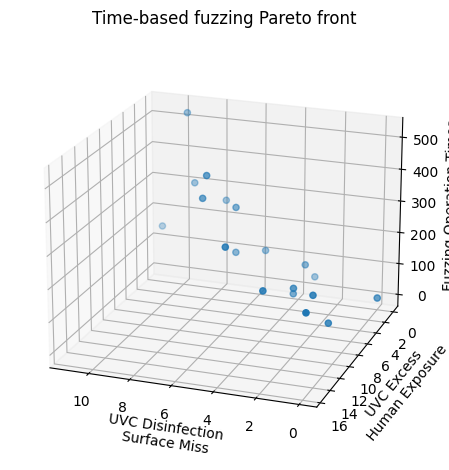

In [17]:
def plot_3d_resultset(frontCSVFile, secondCSVFile, graph_title, savefigFilename):
    df = pd.read_csv(frontCSVFile, delim_whitespace=True)
    if not (secondCSVFile is None):
         df2 = pd.read_csv(secondCSVFile, delim_whitespace=True)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    ax.view_init(20,110)
    ax.scatter(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"])
    
    if not (secondCSVFile is None):
        ax.scatter(df2["uvMissSurface"], df2["uvExcessHuman"], df2["fuzzOpTimes"], color="green")

    ax.set_xlabel("UVC Disinfection\n Surface Miss")
    ax.set_ylabel("UVC Excess\n Human Exposure")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout()
    plt.savefig(savefigFilename)
    plt.show()
    
plot_3d_resultset("locomotec-res-timebased-python", None, "Time-based fuzzing Pareto front", "rq1-timebased-3d-pareto.pdf")

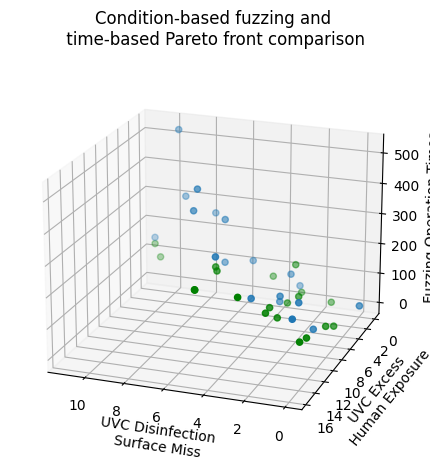

In [18]:
plot_3d_resultset("locomotec-res-timebased-python", "locomotec-res-condfuzz-python", "Condition-based fuzzing and\n time-based Pareto front comparison", "rq2-condbased-3d-pareto.pdf")

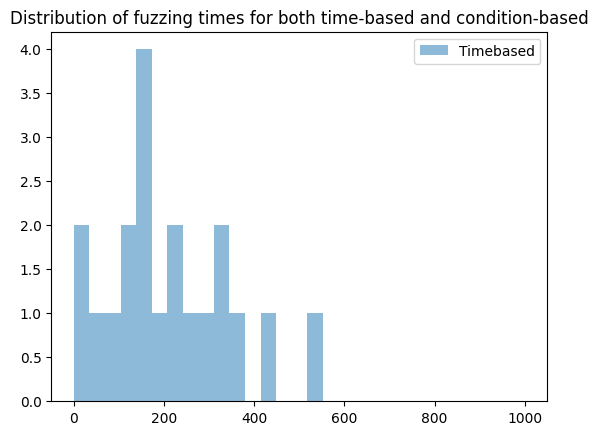

In [19]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(timebased_times, bins, alpha=0.5, label='Timebased')
plt.title("Distribution of fuzzing times for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


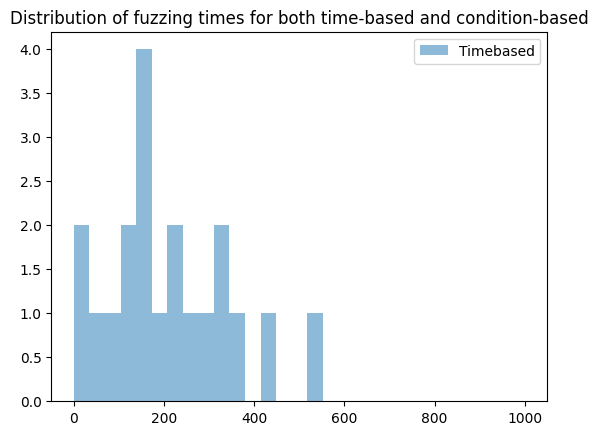

In [20]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
condbased_times = timebased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(condbased_times, bins, alpha=0.5, label='Timebased')
plt.title("Distribution of fuzzing times for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


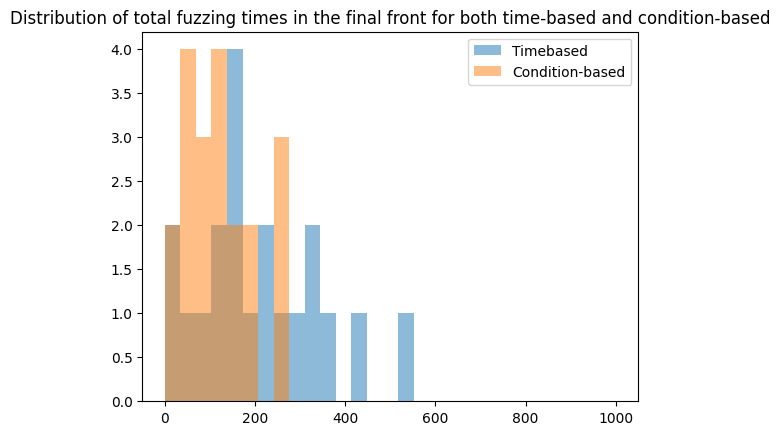

In [21]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]
condbased_times = condbased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(timebased_times, bins, alpha=0.5, label='Timebased')
plt.hist(condbased_times, bins, alpha=0.5, label='Condition-based')
plt.title("Distribution of total fuzzing times in the final front for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


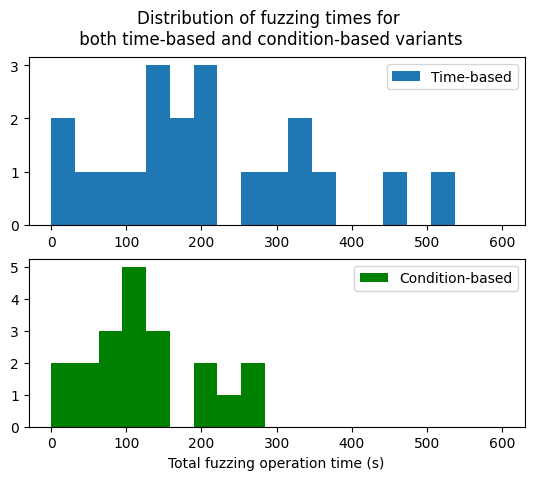

In [22]:
fig, axes = plt.subplots(2, 1)
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]
condbased_times = condbased_res["fuzzOpTimes"]

plt.suptitle("Distribution of fuzzing times for\n both time-based and condition-based variants")
bins = np.linspace(0, 600, 20)
axes[0].hist(timebased_times, bins, alpha=1.0, label='Time-based')
axes[0].legend(loc='upper right')
#axes[0].set(xlabel="Total fuzzing operation time (s)")

axes[1].hist(condbased_times, bins, alpha=1.0, color="green", label='Condition-based')
axes[1].legend(loc='upper right')
axes[1].set(xlabel="Total fuzzing operation time (s)")
plt.savefig("rq2-fuzzing-times.pdf")
plt.show()


In [23]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a / b

array([0.25, 0.4 , 0.5 ])

In [31]:
def get_metric_time_ratios(res_df, metric_dfname):
    metric_time_ratio = res_df[metric_dfname] / res_df["fuzzOpTimes"]
    return metric_time_ratio

In [38]:
timebased_ratios_human = get_metric_time_ratios(timebased_res, "uvExcessHuman")
condbased_ratios_human = get_metric_time_ratios(condbased_res, "uvExcessHuman")
timebased_ratios_surface = get_metric_time_ratios(timebased_res, "uvMissSurface")
condbased_ratios_surface = get_metric_time_ratios(condbased_res, "uvMissSurface")

In [35]:
def plot_relative_ratios(timebased_ratio, timebased_label, condbased_ratio, condbased_label, xlabel, xmax, fig_filename):
    fig, axes = plt.subplots(2, 1)
    # Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing

    plt.suptitle("Distribution of fuzzing metric ratios\n for both time-based and condition-based variants")
    bins = np.linspace(0, xmax, 20)
    axes[0].hist(timebased_ratio, bins, alpha=1.0, label=timebased_label)
    axes[0].legend(loc='upper right')

    axes[1].hist(condbased_ratio, bins, alpha=1.0, color="green", label=condbased_label)
    axes[1].legend(loc='upper right')
    axes[1].set(xlabel=xlabel)
    plt.savefig(fig_filename)
    plt.show()

In [39]:
timebased_ratios_human

0     0.000000
1     0.000153
2     0.000000
3     0.000000
4     0.072692
5     0.104163
6     0.002042
7     0.019572
8     0.055988
9     0.016733
10    0.038756
11    0.059411
12    0.068014
13    0.000000
14    0.013984
15    0.060715
16    0.003221
17    0.012427
18    0.022497
19    0.025096
dtype: float64

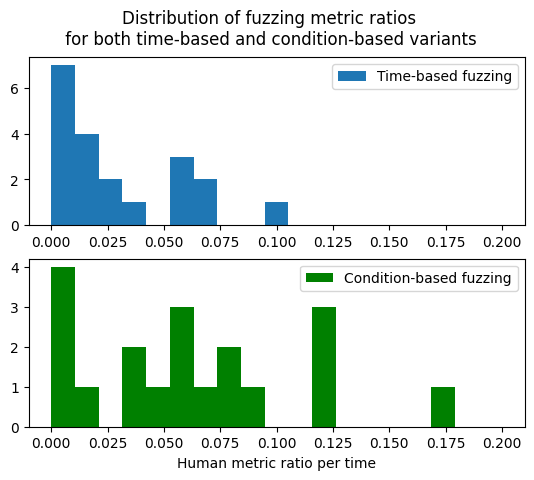

In [40]:
plot_relative_ratios(timebased_ratios_human, "Time-based fuzzing", condbased_ratios_human, "Condition-based fuzzing", "Human metric ratio per time", 0.2, "rq2_human_metric_ratio.pdf")


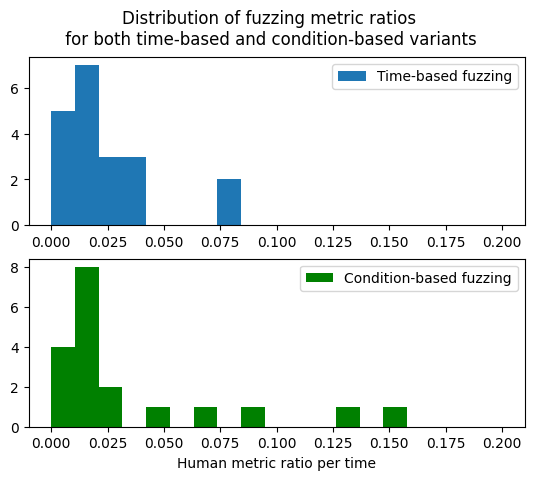

In [41]:
plot_relative_ratios(timebased_ratios_surface, "Time-based fuzzing", condbased_ratios_surface, "Condition-based fuzzing", "Human metric ratio per time", 0.2, "rq2_human_metric_ratio.pdf")